In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# 익숙해지면 좋은 기법을 배울 것이다!!!

In [2]:
data_paths = glob('../dataset/cifar/train/*.png')
data_paths[0]

'../dataset/cifar/train\\0_frog.png'

In [3]:
path = data_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

In [4]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [5]:
image.shape

TensorShape([32, 32, 3])

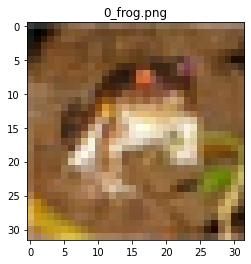

In [6]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

# tf.data

In [7]:
data_paths[:10]

['../dataset/cifar/train\\0_frog.png',
 '../dataset/cifar/train\\10000_automobile.png',
 '../dataset/cifar/train\\10001_frog.png',
 '../dataset/cifar/train\\10002_frog.png',
 '../dataset/cifar/train\\10003_ship.png',
 '../dataset/cifar/train\\10004_ship.png',
 '../dataset/cifar/train\\10005_cat.png',
 '../dataset/cifar/train\\10006_deer.png',
 '../dataset/cifar/train\\10007_frog.png',
 '../dataset/cifar/train\\10008_airplane.png']

In [8]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

In [10]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

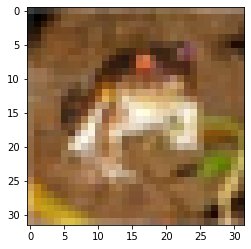

In [11]:
plt.imshow(tf_image)
plt.show()

## Batch로 묶기

In [12]:
batch_size = 32

In [13]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [14]:
tf_images = next(iter(dataset))
tf_images.shape

TensorShape([32, 32, 32, 3])

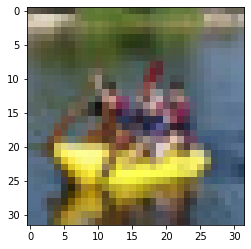

In [15]:
plt.imshow(tf_images[4])
plt.show()

## Shuffle 하기

In [16]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(data_paths))

In [ ]:
tf_images = next(iter(dataset))
plt.imshow(tf_images[0])
plt.show()

# 오래 걸린다.

## Label하고 같이 넣기 

In [17]:
path

'../dataset/cifar/train\\0_frog.png'

In [22]:
class_name = path.split('_')[-1].replace('.png', '')

In [23]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [24]:
path, get_label(path)

('../dataset/cifar/train\\0_frog.png', 'frog')

In [25]:
label_names = [get_label(path) for path in data_paths]

In [27]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

one hot encoding

In [28]:
'frog' == class_names

array([False, False, False, False, False, False,  True, False, False,
       False])

In [29]:
onehot_encoding = np.array(class_names=='frog', np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [31]:
def onehot_encoding(label):
    return np.array(class_name == label , np.uint8)

In [32]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

In [33]:
data_paths[:10]

['../dataset/cifar/train\\0_frog.png',
 '../dataset/cifar/train\\10000_automobile.png',
 '../dataset/cifar/train\\10001_frog.png',
 '../dataset/cifar/train\\10002_frog.png',
 '../dataset/cifar/train\\10003_ship.png',
 '../dataset/cifar/train\\10004_ship.png',
 '../dataset/cifar/train\\10005_cat.png',
 '../dataset/cifar/train\\10006_deer.png',
 '../dataset/cifar/train\\10007_frog.png',
 '../dataset/cifar/train\\10008_airplane.png']

In [34]:
label_names[:10]

['frog',
 'automobile',
 'frog',
 'frog',
 'ship',
 'ship',
 'cat',
 'deer',
 'frog',
 'airplane']

In [35]:
def read_image_label(path,label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

In [37]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() # 꼭 넣어야 한다.

In [38]:
image, label = next(iter(dataset))

In [39]:
image.shape, label.shape

(TensorShape([32, 32, 32, 3]), TensorShape([32]))

In [40]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

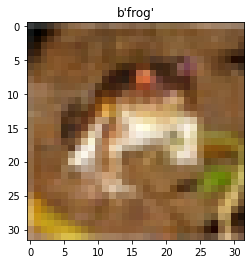

In [41]:
plt.title(np.array(label[0]))
plt.imshow(image[0])
plt.show()

In [43]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() # 꼭 넣어야 한다.

## tensorflow 함수로 label 얻기

In [44]:
path

'../dataset/cifar/train\\0_frog.png'

In [46]:
def onehot_encoding(label):
    return np.array(class_name == label , np.uint8)

In [47]:
fname = tf.strings.split(path, '_')[-1]
lbl_name = tf.strings.regex_replace(fname, '.png', '')
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [48]:
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [49]:
onehot = tf.cast(lbl_name == class_names, tf.uint8) # boolean을 int로 바꾼다.
onehot

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

In [50]:
# ★ 필요하다.
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return onehot

In [52]:
def load_image_label(path):
    # read iabme
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    
    #get label
    label = get_label(path)
    return image, label

In [53]:
# ★ 필요하다.
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(load_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [54]:
image, label = next(iter(dataset))

In [55]:
image.shape

TensorShape([32, 32, 32, 3])

In [56]:
label.shape

TensorShape([32, 10])

In [57]:
label[0]

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)>

C:\Users\pmcsh\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


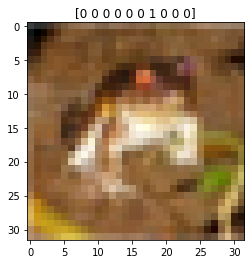

In [58]:
plt.title(np.array(label[0]))
plt.imshow(image[0])
plt.show()